<a href="https://colab.research.google.com/github/fbeilstein/dbms/blob/master/DB_lecture_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title CS:GO

from IPython.display import YouTubeVideo
YouTubeVideo('Ur3JRDg3olc', width=600, height=400)

[cs:go networking](https://developer.valvesoftware.com/wiki/Source_Multiplayer_Networking)

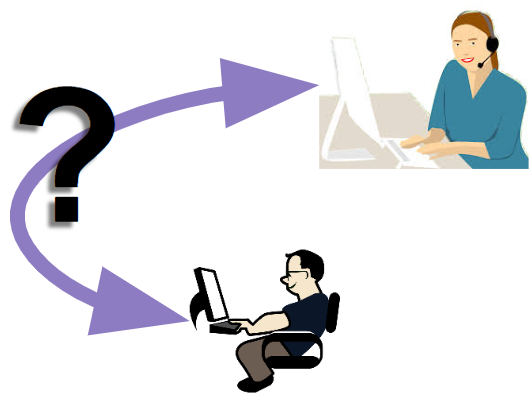

From [CS documentation](https://developer.valvesoftware.com/wiki/Source_Multiplayer_Networking)

![img](https://developer.valvesoftware.com/w/images/e/ea/Networking1.gif)

**Servers that Support Tickrate**

* The tickrate can be altered by using the -tickrate parameter
  - Counter-Strike: Global Offensive
  - Half-Life 2: Deathmatch

The following servers tickrate cannot be altered as changing this causes server timing issues.


* Tickrate 66
  - Counter-Strike: Source
  - Day of Defeat: Source
  - Team Fortress 2

* Tickrate 30
  - Left 4 Dead
  - Left 4 Dead 2

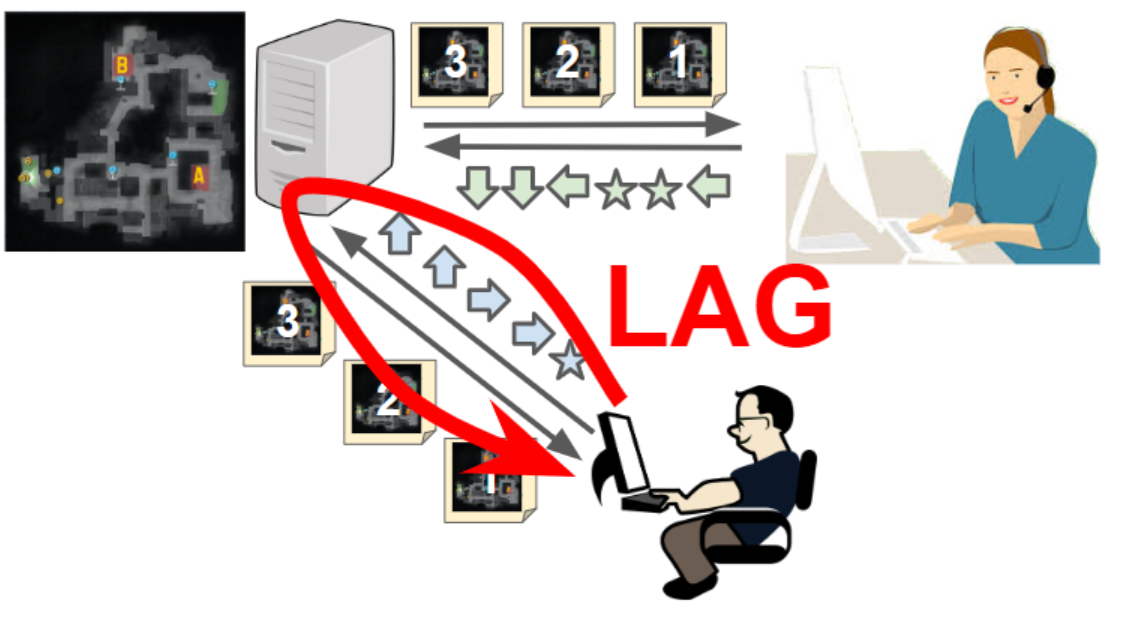

In [ ]:
#@title Server Ticks

from IPython.display import YouTubeVideo
YouTubeVideo('6EwaW2iz4iA', width=600, height=400, start=136, end=148)

In [ ]:
#@title What we see if No Interpolation, No Speculation

from IPython.display import YouTubeVideo
YouTubeVideo('6EwaW2iz4iA', width=600, height=400, start=162, end=173)

In [ ]:
#@title Game, No Speculation, No Interpolation


from IPython.display import YouTubeVideo
YouTubeVideo('GX4595KeZyc', width=600, height=400, start=190, end=204)

We should be able to tolerate lag up to 200ms

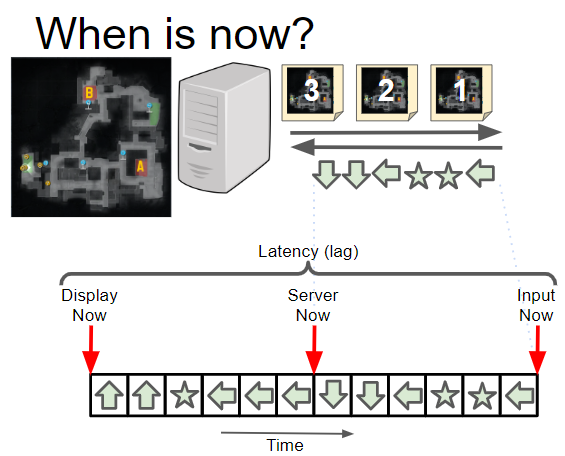

Lets assume a player has a network latency of 150 milliseconds and starts to move forward. The information that the +FORWARD key is pressed is stored in a user command and send to the server. There the user command is processed by the movement code and the player's character is moved forward in the game world. This world state change is transmitted to all clients with the next snapshot update. So the player would see his own change of movement with a 150 milliseconds delay after he started walking. This delay applies to all players actions like movement, shooting weapons, etc. and becomes worse with higher latencies.

A delay between player input and corresponding visual feedback creates a strange, unnatural feeling and makes it hard to move or aim precisely. Client-side input prediction (cl_predict 1) is a way to remove this delay and let the player's actions feel more instant. Instead of waiting for the server to update your own position, the local client just predicts the results of its own user commands. Therefore, the client runs exactly the same code and rules the server will use to process the user commands. **After the prediction is finished, the local player will move instantly to the new location while the server still sees him at the old place.**



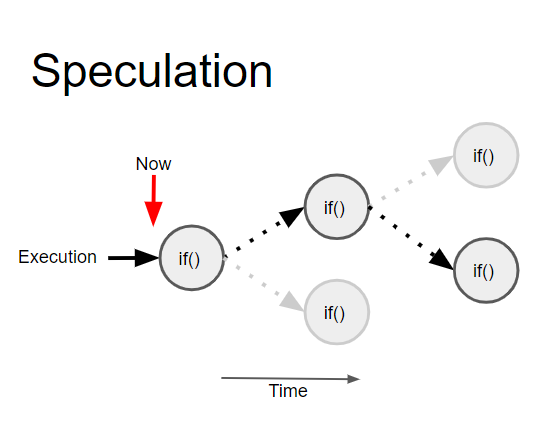

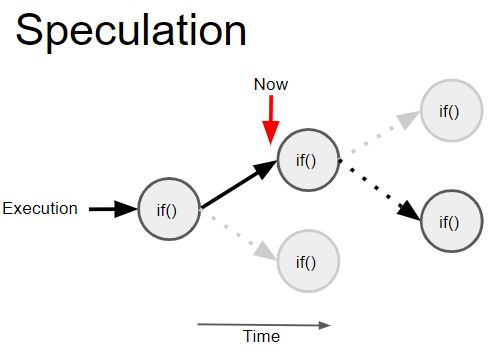

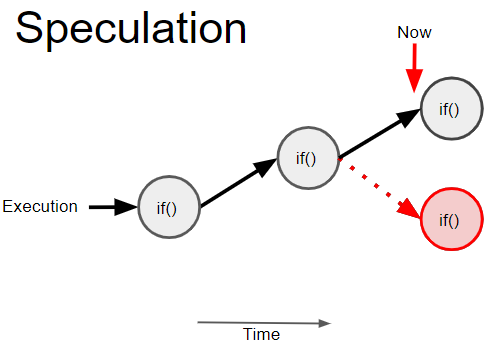

**tell them about meltdown and spectre (just for lulz)**

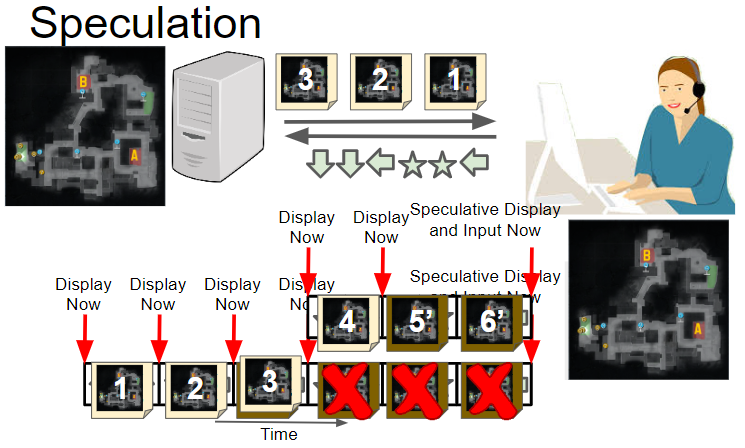

After 150 milliseconds, the client will receive the server snapshot that contains the changes based on the user command he predicted earlier. Then the client compares the server position with his predicted position. **If they are different**, a prediction error has occurred. **This indicates that the client didn't have the correct information about other entities and the environment when it processed the user command.** Then the client has to correct its own position, since the server has final authority over client-side prediction. If cl_showerror 1 is turned on, clients can see when prediction errors happen. Prediction error correction can be quite noticeable and may cause the client's view to jump erratically. By gradually correcting this error over a short amount of time (cl_smoothtime), errors can be smoothly corrected. Prediction error smoothing can be turned off with cl_smooth 0.

Prediction is only possible for the local player and entities affected only by him, since prediction works by using the client's keypresses to make a "best guess" of where the player will end up. Predicting other players would require literally predicting the future with no data, since there's no way to instantaneously get keypresses from them.

In [ ]:

#@title Game, Prediction-Speculation, No Interpolation

from IPython.display import YouTubeVideo
YouTubeVideo('ozeKUtSXqXk', width=600, height=400, start=214, end=230)

Source defaults to an interpolation period ('lerp') of 100-milliseconds (cl_interp 0.1); this way, even if one snapshot is lost, there are always two valid snapshots to interpolate between. Take a look at the following figure showing the arrival times of incoming world snapshots:

![img](https://developer.valvesoftware.com/w/images/4/49/Interpolation.gif)

In [ ]:
#@title Server Interpolation

from IPython.display import YouTubeVideo
YouTubeVideo('6EwaW2iz4iA', width=600, height=400, start=148, end=161)

In [ ]:
#@title Interpolation Peeker Advantage

from IPython.display import YouTubeVideo
YouTubeVideo('hjiO13vuSKI', width=600, height=400, start=0)

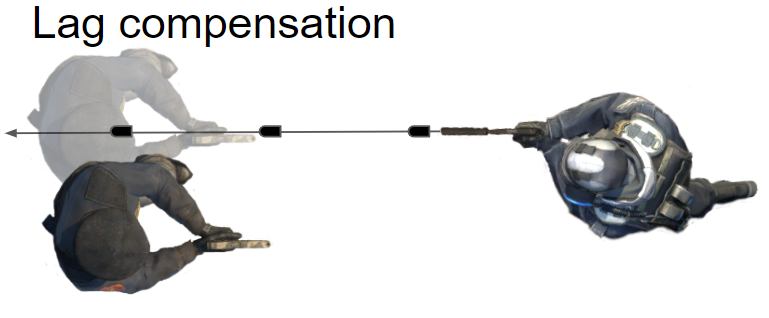

In [ ]:
#@title Lag Problem

from IPython.display import YouTubeVideo
YouTubeVideo('6EwaW2iz4iA', width=600, height=400, start=38, end=45)

In [ ]:
#@title Game, NO Lag Compensation

from IPython.display import YouTubeVideo
YouTubeVideo('6EwaW2iz4iA', width=600, height=400, start=0, end=8)

The process responsible for this is **lag compensation** in which the server accounts for both ping and interpolation timings through the formula:

Command Execution Time = Current Server Time – (Packet Latency + Client View Interpolation)

In [ ]:
#@title Lag Compensation (how it should be)

from IPython.display import YouTubeVideo
YouTubeVideo('6EwaW2iz4iA', width=600, height=400, start=46, end=56)

In [ ]:
#@title Lag Compensation (Solution)

from IPython.display import YouTubeVideo
YouTubeVideo('6EwaW2iz4iA', width=600, height=400, start=56, end=84)

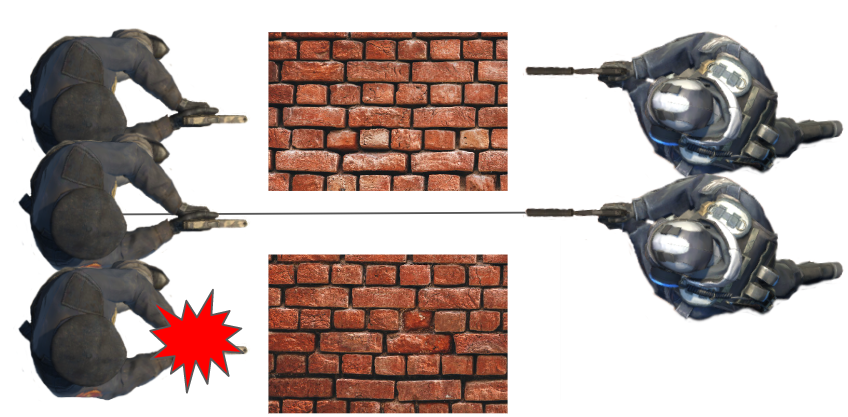

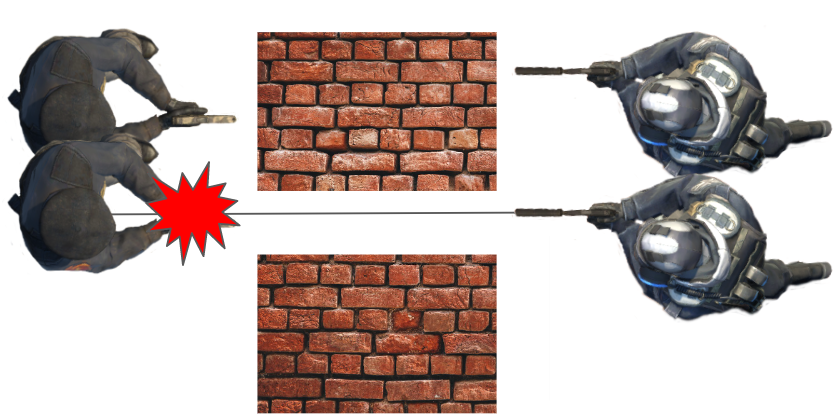

In [ ]:
#@title Player 1 View

from IPython.display import YouTubeVideo
YouTubeVideo('uL023fD1ycQ', width=600, height=400, start=0, end=12)

In [ ]:
#@title Player 1 SloMo

from IPython.display import YouTubeVideo
YouTubeVideo('uL023fD1ycQ', width=600, height=400, start=19, end=50)

In [ ]:
#@title Player 2 View

from IPython.display import YouTubeVideo
YouTubeVideo('uL023fD1ycQ', width=600, height=400, start=14, end=18)

In [ ]:
#@title Player 2 SloMo

from IPython.display import YouTubeVideo
YouTubeVideo('uL023fD1ycQ', width=600, height=400, start=51)

**Can we do better?**

* Linear extrapolation
* Use derivative of motion
* Use AI to predict motion
* On misprediction:
  - Rewind speculation
  - replay with new data


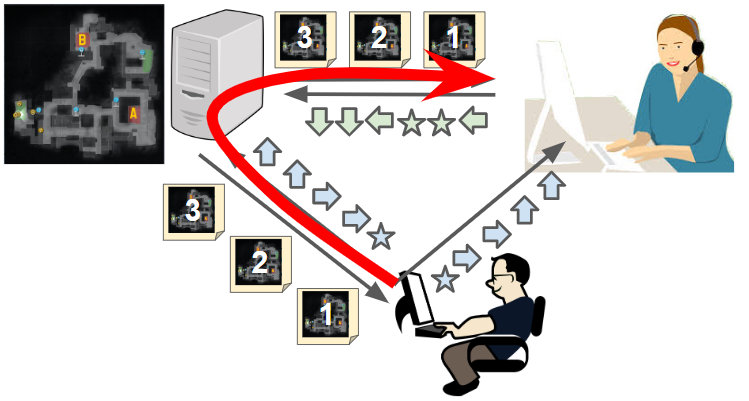

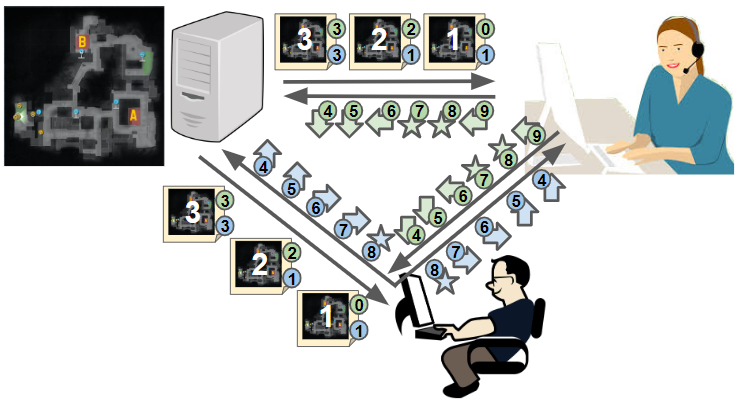